In [1]:
# Libraries Needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, probplot, poisson, chisquare
from datetime import date
from clean import clean_data

# Data Cleaning and Reading

In [ ]:
df = pd.read_csv("data/data13_small.csv")

,employee_id,first_name,last_name,email,phone_number,department,job_title,hire_date,days_service,base_salary,...,performance_score,last_review_date,employee_level,vacation_days,sick_days,work_location,shift,emergency_contact,ssn,bank_account
426942,EMP1823550913,Susan,Miles,susan.miles@company.com,+1-869-823-5481x681,Security,Cybersecurity Analyst,2023-02-08,793,31654.05,...,59.07,2023-06-05,Senior,17,4,Office,Flexible,353-200-5125x776,483-73-7652,IOZU37967553213651
113812,EMP1908971953,Richard,Olson,richard.olson@company.com,568-565-8530x980,IT,Database Administrator,2025-02-01,69,70568.34,...,80.79,2025-02-04,Entry,7,6,Office,Day,995.572.4418x0465,372-97-6412,MKAH58438258258291
129475,EMP9626234535,James,Bailey,james.bailey@company.com,001-959-774-7231x94425,Support,Help Desk Technician,2024-04-29,347,72339.54,...,77.54,2024-07-12,Entry,12,6,Office,Night,766.320.3352x571,446-48-1137,BHLP56844057740001
725686,EMP4391838226,John,Todd,john.todd@company.com,840.631.4132x089,Marketing,Marketing Manager,2020-12-24,1569,30000.00,...,86.28,2023-08-05,Senior,8,5,Hybrid,Day,(921)663-8458,695-10-5733,BTWS35692949062977
772386,EMP2913507079,Daniel,Anderson,daniel.anderson@company.com,533-409-2403,Design,Graphic Designer,2023-06-09,672,73737.19,...,77.05,2023-06-17,Mid,17,6,Remote,Day,723.793.7658,623-09-4914,XUSJ04100313091696


In [3]:
# Cleaning data
df = clean_data.clean(df)

# Df elements

print("Columns: ", df.columns)
print("Shape: ", df.shape)
print("Types: ", df.dtypes)

Dropping unused columns
Remaining columns 23
None
Dropping NA rows
Remaining rows 1000000
Dropping duplicates
Remaining rows 1000000
Turning dates into datetime
Turned to dates
Verifying numeric types
Remaining rows 1000000
Verifying dates
Remaining rows 1000000
Columns:  Index(['employee_id', 'first_name', 'last_name', 'email', 'department',
       'job_title', 'hire_date', 'days_service', 'base_salary',
       'bonus_percentage', 'status', 'birth_date', 'city', 'state', 'gender',
       'education', 'performance_score', 'last_review_date', 'employee_level',
       'vacation_days', 'sick_days', 'work_location', 'shift'],
      dtype='object')
Shape:  (1000000, 23)
Types:  employee_id                  object
first_name                   object
last_name                    object
email                        object
department                   object
job_title                    object
hire_date            datetime64[ns]
days_service                  int64
base_salary                 fl

# Analysis of each column

### Department

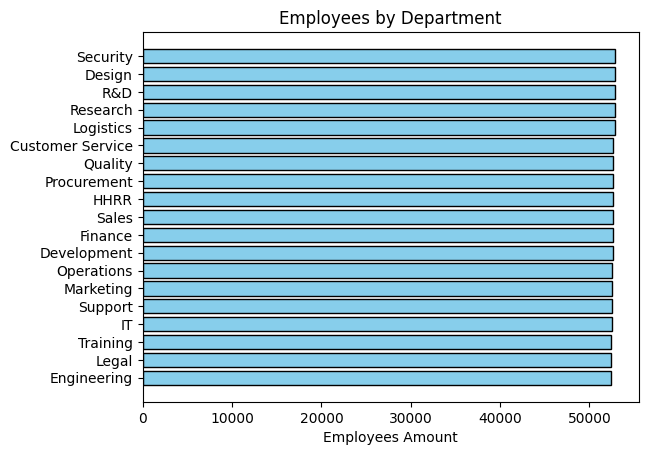

In [4]:
data = df["department"].value_counts()
data = dict(sorted(data.items(), key= lambda x : x[1]))
departments = list(data.keys())
values = list(data.values())

plt.barh(departments, values, color="skyblue", edgecolor="black")
plt.title("Employees by Department")
plt.xlabel("Employees Amount")
plt.show()

The departments plot show an uniform distribution and all of them have approximately 50.000 employees. 

### Employees Age

Min Age:  18
Max Age:  66


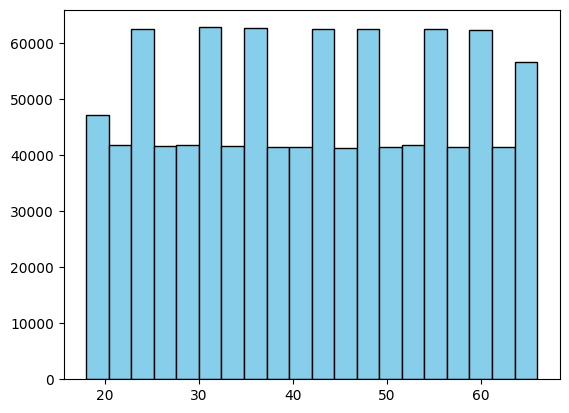

In [5]:
def getAge(birth):
    today = date.today()
    age = today.year - birth.year
    return age

df["age"] = df["birth_date"].apply(getAge)

print("Min Age: ", df["age"].min())
print("Max Age: ", df["age"].max())

plt.hist(df["age"], bins=20, color="skyblue", edgecolor="black")
plt.show()

The age of the employees tries to follow a uniform distribution and all the people in the company adult form 18 to 66 years. 

### Job Title

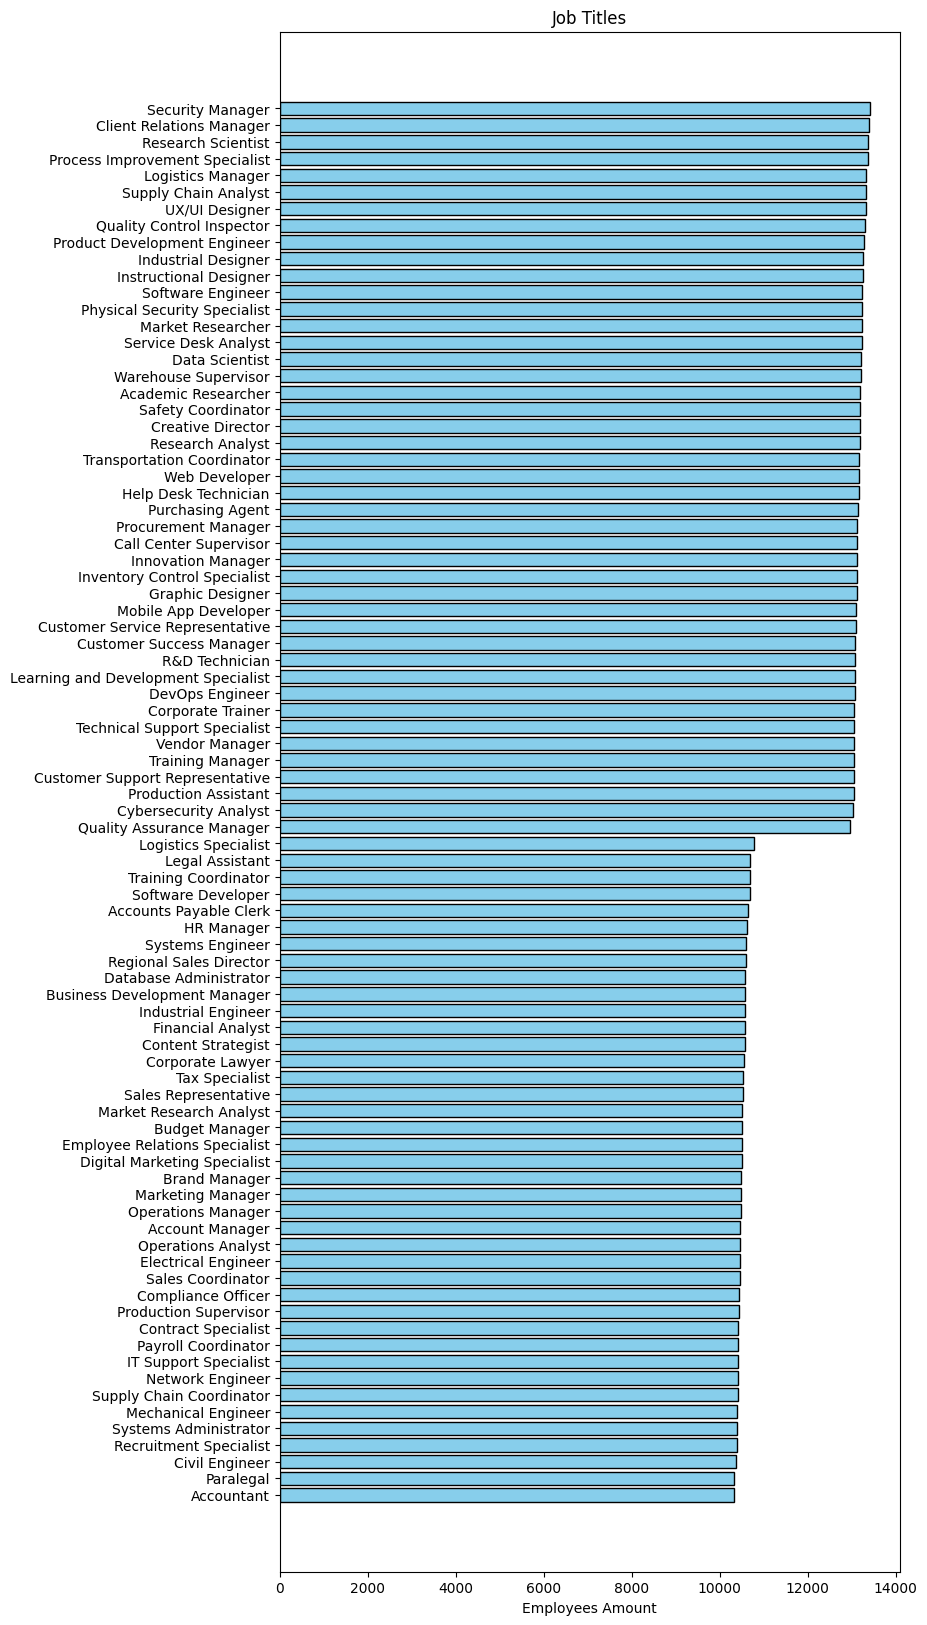

In [6]:
data = df["job_title"].value_counts()
data = dict(sorted(data.items(), key= lambda x : x[1]))
job_titles = list(data.keys())
values = list(data.values())

plt.figure(figsize=(8, 20))
plt.title("Job Titles")
plt.xlabel("Employees Amount")
plt.barh(job_titles, values, color="skyblue", edgecolor="black")
plt.show()

The horizontal bar plot of the job titles have a weighted distribution among employees, indicating varying frequencies across different roles.

### Days of Service

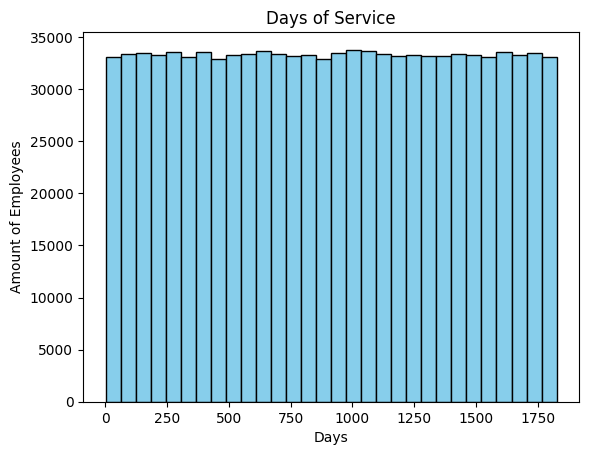

In [7]:
days_service = df["days_service"]

plt.hist(days_service, bins=30, color="skyblue", edgecolor="black")
plt.title("Days of Service")
plt.xlabel("Days")
plt.ylabel("Amount of Employees")
plt.show()

The bar plot of the employees days of service follow a uniform distribution, suggesting that the company hires new staff at regular intervals.

### Base Salary

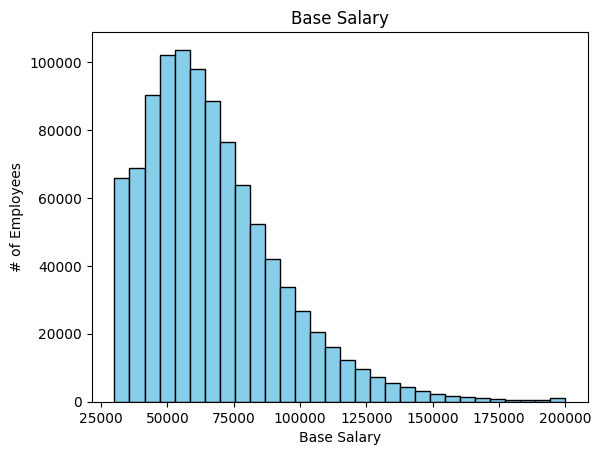

In [8]:
base_salary = df["base_salary"]

plt.hist(base_salary, bins=30, color="skyblue", edgecolor="black")
plt.ylabel("# of Employees")
plt.xlabel("Base Salary")
plt.title("Base Salary")
plt.show()

### Performance Score

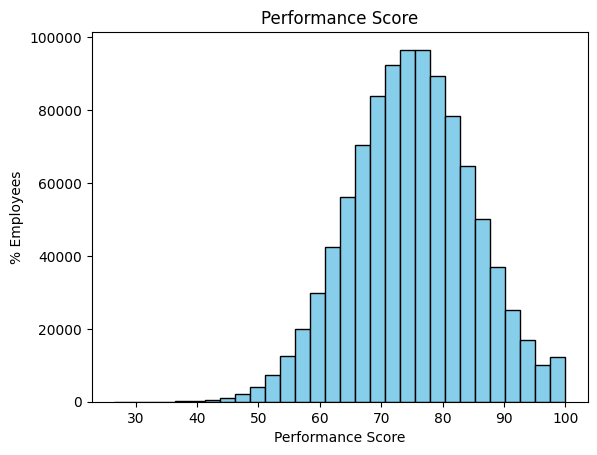

In [9]:
performance_score = df["performance_score"]

plt.hist(df["performance_score"], bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Performance Score")
plt.ylabel("% Employees")
plt.title("Performance Score")
plt.show()

Most employees have a performance score between 70 and 80 points, their performance seems to follow a normal distribution. 

#### Normal Test

In [10]:
stat, p = normaltest(df["performance_score"])
print("p-value:", p)
if p > 0.05:
    print("Probably a normal distribution.")
else:
    print("Probably not a normal distribution.")

p-value: 5.703145824065608e-200
Probably not a normal distribution.


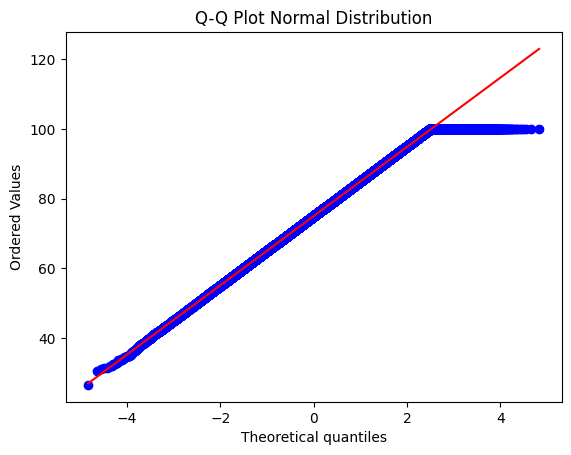

In [11]:
probplot(df['performance_score'], dist="norm", plot=plt)
plt.title("Q-Q Plot Normal Distribution")
plt.show()

Most of the data appears to follow a normal distribution, except for the higher extreme, suggesting that performance is constrained within the 40 to 100 range.

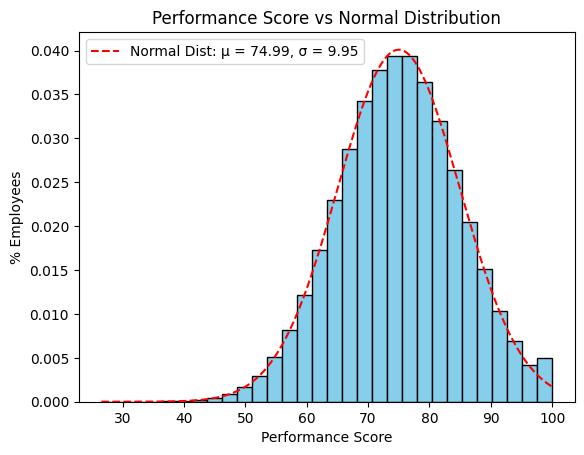

In [12]:
performance_score = df["performance_score"]

plt.hist(df["performance_score"], bins=30, color="skyblue", density=True)
mean = round(performance_score.mean(), 2)
deviation = round(performance_score.std(), 2)

x = np.linspace(performance_score.min(), performance_score.max(), 500)
y = (1 / (deviation * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / deviation) ** 2)

plt.plot(x, y, color="red", label=f"Normal Dist: µ = {mean}, σ = {deviation}", linestyle="--")
plt.hist(performance_score, density=True, color="skyblue", bins=30, edgecolor="black")
plt.title("Performance Score vs Normal Distribution")
plt.xlabel("Performance Score")
plt.ylabel("% Employees")
plt.legend()
plt.show()

The performance scores follow a normal distribution with a mean of 75 and a standard deviation of 9.95 points, indicating significant variability in employee performance across the company.

### Bonus Percentage

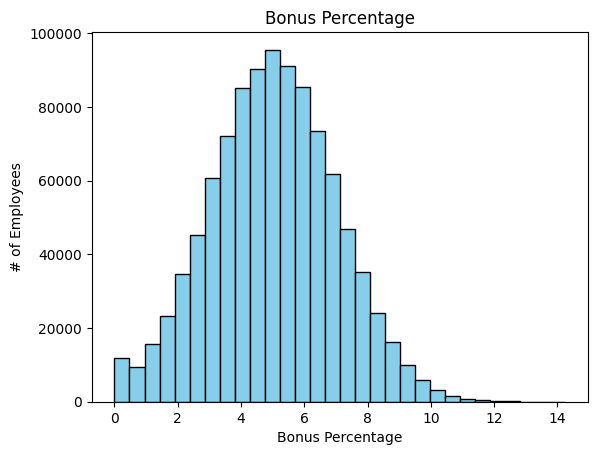

In [30]:
bonus_percentage = df["bonus_percentage"]

plt.hist(bonus_percentage, bins=30, color="skyblue", edgecolor="black")
plt.title("Bonus Percentage")
plt.xlabel("Bonus Percentage")
plt.ylabel("# of Employees")
plt.show()

#### Normal Test

In [ ]:
stat, p = normaltest(df["bonus_percentage"])
print("p-value:", p)
if p > 0.05:
    print("Probably a normal distribution.")
else:
    print("Probably not a normal distribution.")

p-value: 7.798309301679813e-205
Probably not a normal distribution.


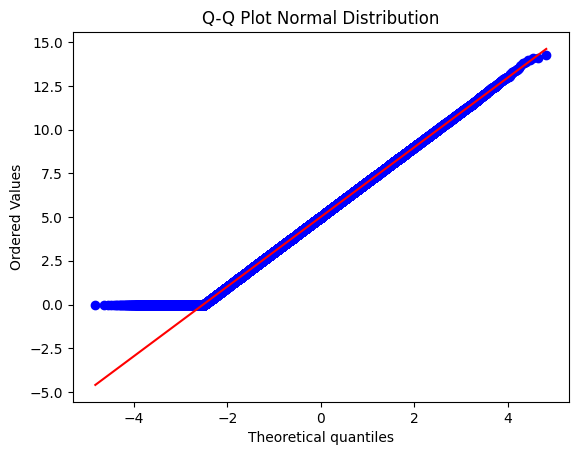

In [ ]:
probplot(df['bonus_percentage'], dist="norm",  plot=plt)
plt.title("Q-Q Plot Normal Distribution")
plt.show()

Most of the data appears to follow a normal distribution, except for the lower extreme, suggesting that bonus percentage is constrained within the 0 to 14 range.

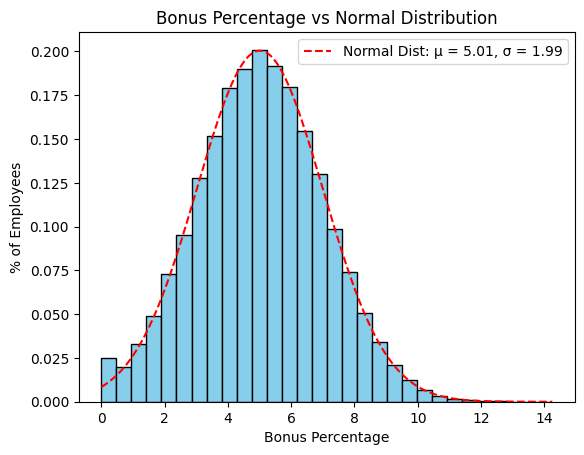

In [ ]:
bonus_percentage = df["bonus_percentage"]

plt.hist(df["bonus_percentage"], bins=30, color="skyblue", density=True)
mean = round(bonus_percentage.mean(), 2)
deviation = round(bonus_percentage.std(), 2)

x = np.linspace(bonus_percentage.min(), bonus_percentage.max(), 500)
y = (1 / (deviation * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / deviation) ** 2)

plt.plot(x, y, color="red", label=f"Normal Dist: µ = {mean}, σ = {deviation}", linestyle="--")
plt.hist(bonus_percentage, density=True, color="skyblue", bins=30, edgecolor="black")
plt.xlabel("Bonus Percentage")
plt.ylabel("% of Employees")
plt.title("Bonus Percentage vs Normal Distribution")
plt.legend()
plt.show()

The bonus percentage follow a normal distribution with a mean of 5 and a standard deviation of 1.99 points, indicating low variability in the bonuses received by employees.

### Employee Level

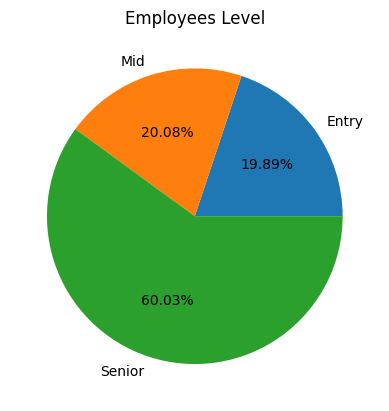

In [13]:
data = df["employee_level"].value_counts()
data = dict(sorted(data.items(), key=lambda x : x[1]))
levels = data.keys()
values = data.values()

plt.pie(values, labels=levels, autopct="%.2f%%")
plt.title("Employees Level")
plt.show()

The majority of employees in the company have more than 10 years of experience. Approximately 20% have between 2 and 5 years of experience, while the remaining employees have less than 2 years of experience.

### Vacation days

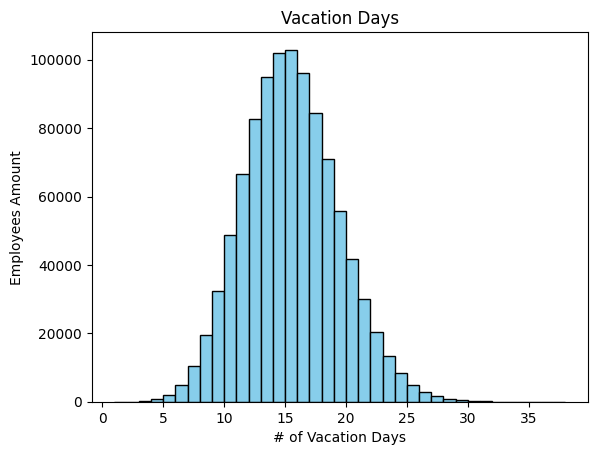

In [14]:
vacation_days = df["vacation_days"]

plt.hist(vacation_days, bins=37, color="skyblue", edgecolor="black")
plt.title("Vacation Days")
plt.xlabel("# of Vacation Days")
plt.ylabel("Employees Amount")
plt.show()

The number of vacation days for employees ranges from 3 to 30, with the majority having 15 days of vacation. 

#### Normal Test

In [15]:
stat, p = normaltest(df["vacation_days"])
print("p-value:", p)
if p > 0.05:
    print("Probably a normal distribution.")
else:
    print("Probably not a normal distribution.")

p-value: 0.0
Probably not a normal distribution.


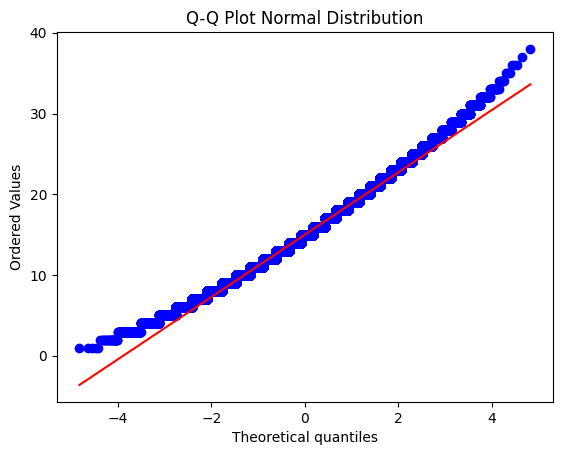

In [16]:
probplot(df['vacation_days'], dist="norm", plot=plt)
plt.title("Q-Q Plot Normal Distribution")
plt.show()

The vacation days appear to follow a normal distribution; however, the extremes of the data are too distant to confirm this pattern.

#### Poisson Test

In [17]:
vacation_days = df["vacation_days"]

lambda_poisson = np.mean(vacation_days)
values, frequencies = np.unique(vacation_days, return_counts=True)

expected_frequencies = poisson.pmf(values, mu=lambda_poisson) * np.sum(frequencies)
expected_frequencies *= frequencies.sum() / expected_frequencies.sum()
stat, p = chisquare(f_obs=frequencies, f_exp=expected_frequencies)

print(f"Statistical χ²: {stat:.4f}")
print(f"p-value: {p:.4f}")
if p > 0.05:
    print("The data may follow a Poisson distribution.")
else:
    print("The data may not follow a Poisson distribution.")

Statistical χ²: 35.8360
p-value: 0.5235
The data may follow a Poisson distribution.


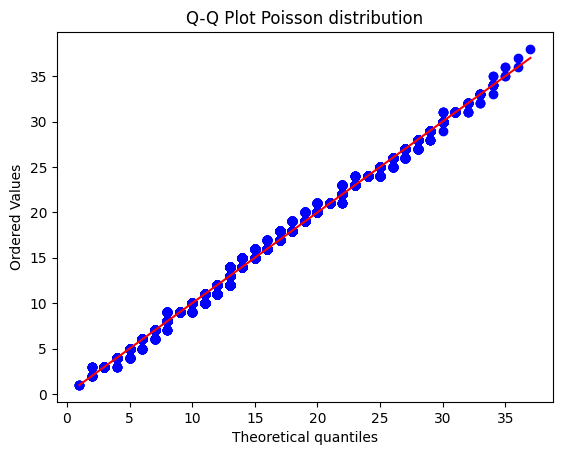

In [18]:
lambda_poisson = df["vacation_days"].mean()
probplot(df['vacation_days'], dist=poisson, sparams=(lambda_poisson, ), plot=plt)
plt.title("Q-Q Plot Poisson distribution")
plt.show()

The vacation days data mostly aligns with the quantile probabilities of a Poisson distribution.

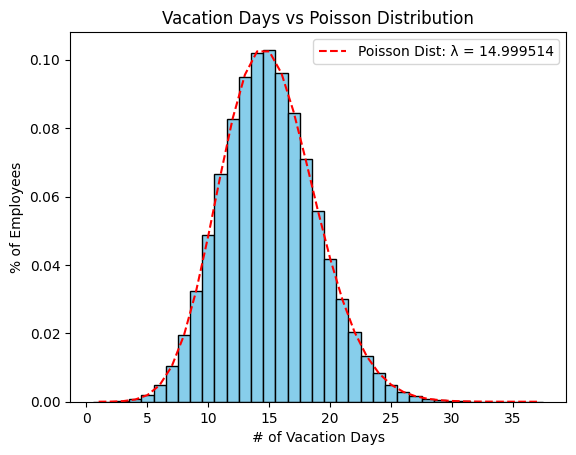

In [19]:
vacation_days = df["vacation_days"]

lambda_poisson = np.mean(vacation_days)
x = np.arange(min(vacation_days), max(vacation_days))
pmf_poisson = poisson.pmf(x, mu=lambda_poisson)

plt.hist(vacation_days, density=True, bins=37, color="skyblue", edgecolor="black", align="left")
plt.plot(x, pmf_poisson, color="red", label=f"Poisson Dist: λ = {lambda_poisson}", linestyle="--")
plt.title("Vacation Days vs Poisson Distribution")
plt.ylabel("% of Employees")
plt.xlabel("# of Vacation Days")
plt.legend()
plt.show()

### Sick Days

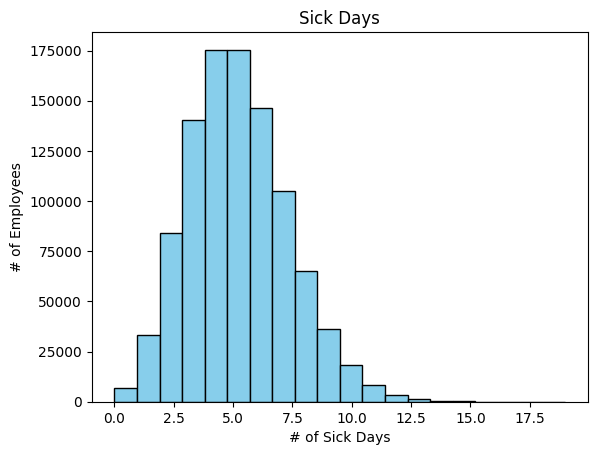

In [20]:
sick_days = df["sick_days"]

plt.hist(sick_days, bins=20, color="skyblue", edgecolor="black")
plt.title("Sick Days")
plt.ylabel("# of Employees")
plt.xlabel("# of Sick Days")
plt.show()

The number of sick days taken by employees ranges from 0 to 15, with the majority reporting 5 days of illness.

#### Normal Test

In [21]:
stat, p = normaltest(df["sick_days"])
print("p-value:", p)
if p > 0.05:
    print("Probably a normal distribution.")
else:
    print("Probably not a normal distribution.")

p-value: 0.0
Probably not a normal distribution.


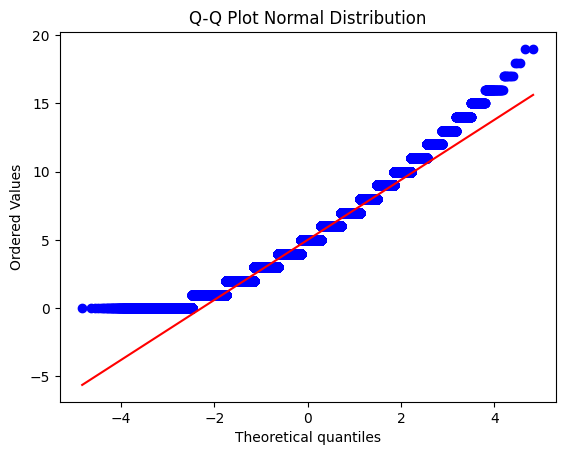

In [22]:
probplot(df['sick_days'], dist="norm", plot=plt)
plt.title("Q-Q Plot Normal Distribution")
plt.show()

The sick days appear to follow a normal distribution; however, the extremes of the data are too distant to confirm this pattern.

#### Poisson Test

In [23]:
sick_days = df["sick_days"]

lambda_poisson = np.mean(sick_days)
values, frequencies = np.unique(sick_days, return_counts=True)

expected_frequencies = poisson.pmf(values, mu=lambda_poisson) * np.sum(frequencies)
expected_frequencies *= frequencies.sum() / expected_frequencies.sum()
stat, p = chisquare(f_obs=frequencies, f_exp=expected_frequencies)

print(f"Statistical χ²: {stat:.4f}")
print(f"p-value: {p:.4f}")
if p > 0.05:
    print("The data may follow a Poisson distribution.")
else:
    print("The data may not follow a Poisson distribution.")

Statistical χ²: 15.3430
p-value: 0.7006
The data may follow a Poisson distribution.


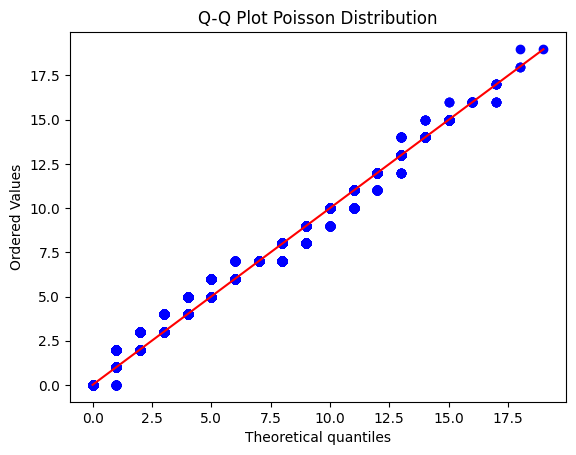

In [26]:
lambda_poisson = df["sick_days"].mean()
probplot(df['sick_days'], dist=poisson, sparams=(lambda_poisson, ),  plot=plt)
plt.title("Q-Q Plot Poisson Distribution")
plt.show()

The sick days data mostly aligns with the quantile probabilities of a Poisson distribution.

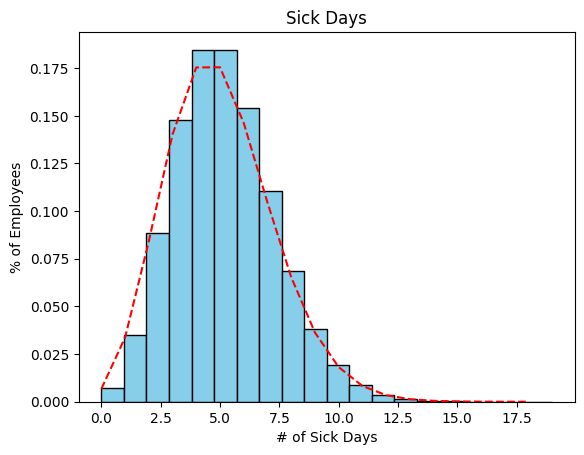

In [27]:
sick_days = df["sick_days"]

lambda_poisson = np.mean(sick_days)
x = np.arange(min(sick_days), max(sick_days))
pmf_poisson = poisson.pmf(x, mu=lambda_poisson)

plt.hist(sick_days, density=True, bins=20, color="skyblue", edgecolor="black")
plt.plot(x, pmf_poisson, color="red", label=f"Poisson Dist: λ = {lambda_poisson}", linestyle="--")
plt.ylabel("% of Employees")
plt.xlabel("# of Sick Days")
plt.title("Sick Days")
plt.show()

### Work Location

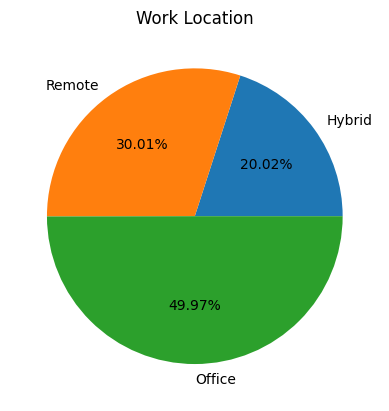

In [28]:
work_location = df["work_location"]
data = df["work_location"].value_counts()
data = dict(sorted(data.items(), key=lambda x : x[1]))
locations = data.keys()
values = data.values()

plt.pie(values, labels=locations, autopct="%.2f%%")
plt.title("Work Location")
plt.show()

The pie chart shows that most employees work on-site, while the remaining half either work fully remotely or alternate between remote and in-office work.

### Shift

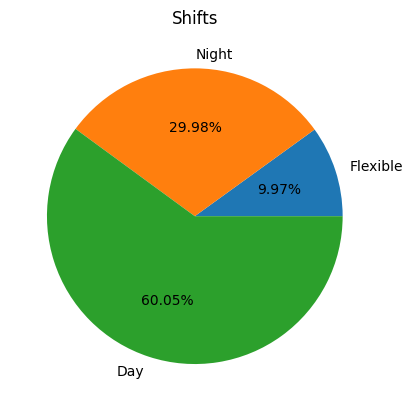

In [29]:
shift = df["shift"].value_counts()
data = dict(sorted(shift.items(), key=lambda x : x[1]))
shifts = data.keys()
values = data.values()

plt.pie(values, labels=shifts, autopct="%.2f%%")
plt.title("Shifts")
plt.show()

The pie chart shows that 60% of employees prefer to work the day shift, while the remaining employees either work at night or have a flexible schedule, with the latter being the least common.

### Status

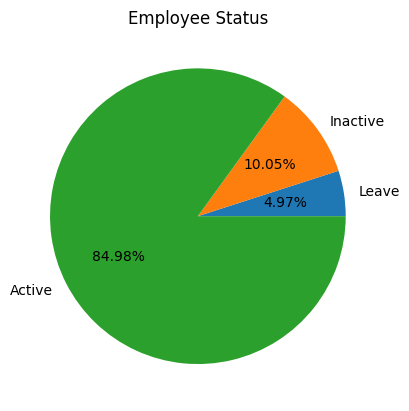

In [34]:
data = df["status"].value_counts()
data = dict(sorted(data.items(), key=lambda x : x[1]))
status = data.keys()
values = data.values()

plt.pie(values, labels=status, autopct="%.2f%%")
plt.title("Employee Status")
plt.show()

Most employees are currently active in the company, 10% are inactive, and the remaining have already left.

### City

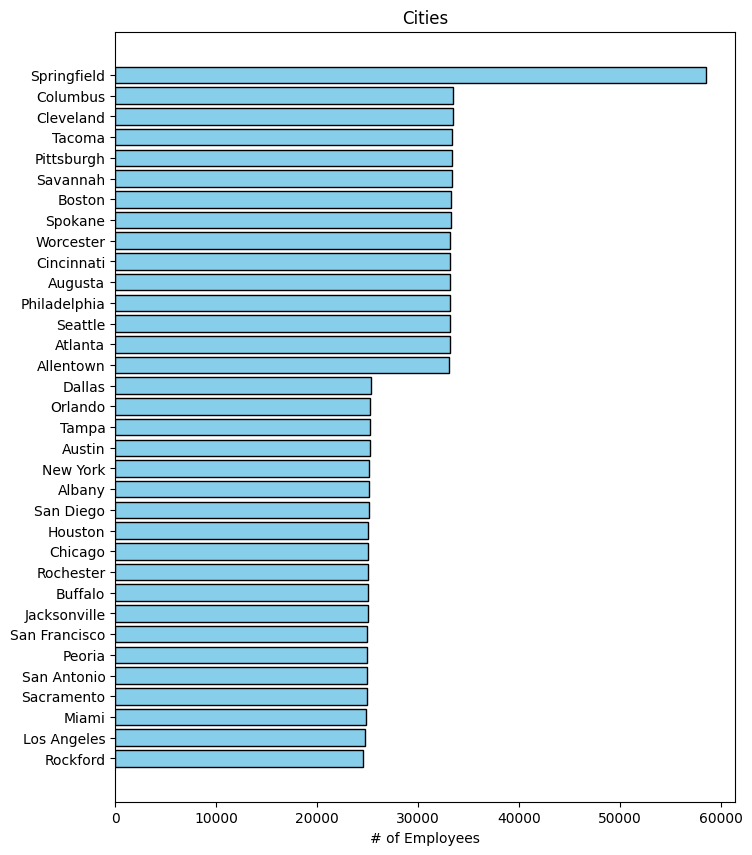

In [35]:
data = df["city"].value_counts()
data = dict(sorted(data.items(), key=lambda x : x[1]))
cities = data.keys()
values = data.values()

plt.figure(figsize=(8, 10))
plt.barh(cities, values, color="skyblue", edgecolor="black")
plt.title("Cities")
plt.xlabel("# of Employees")
plt.show()

The bar plot indicates a hiring preference for candidates from Springfield, while the rest of the cities shows a more uniform distribution, highlighting a weighted hiring pattern.

### State

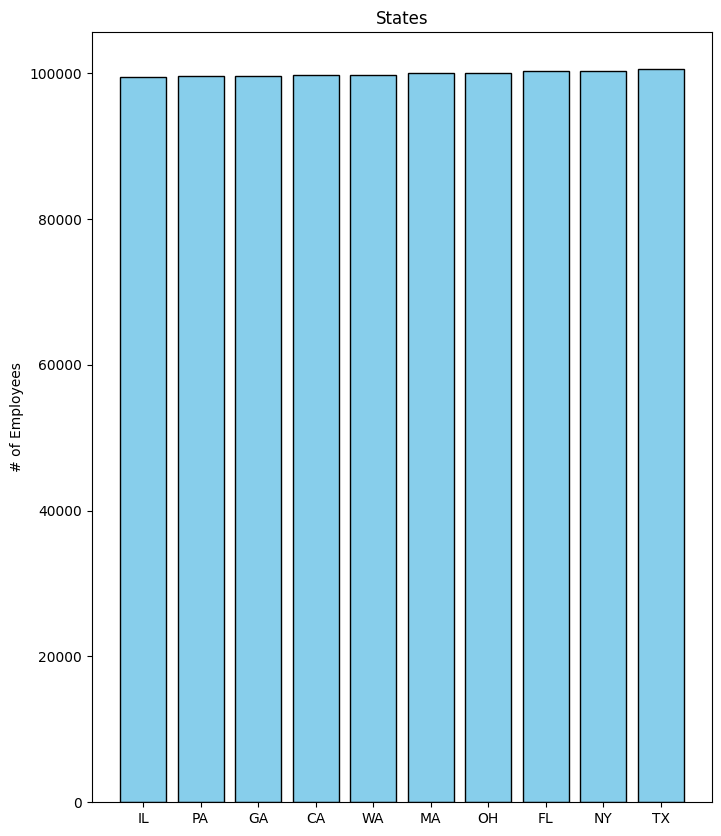

In [36]:
data = df["state"].value_counts()
data = dict(sorted(data.items(), key=lambda x : x[1]))
states = data.keys()
values = data.values()

plt.figure(figsize=(8, 10))
plt.bar(states, values, color="skyblue", edgecolor="black")
plt.title("States")
plt.ylabel("# of Employees")
plt.show()

The company employs individuals from some states across the country, and their distribution is uniform.

### Gender

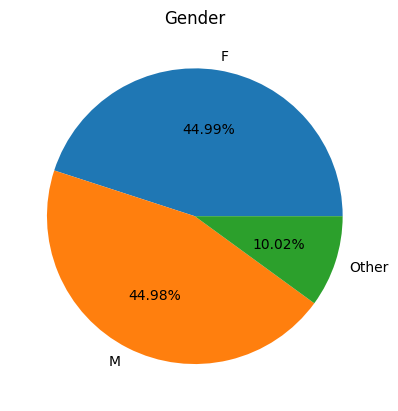

In [38]:
data = dict(df["gender"].value_counts())
genders = data.keys()
values = data.values()

plt.pie(values, labels=genders, autopct="%.2f%%")
plt.title("Gender")
plt.show()

10% of the employees in the company do not identify as either male or female, while the remaining employees identify as either male or female.

### Education

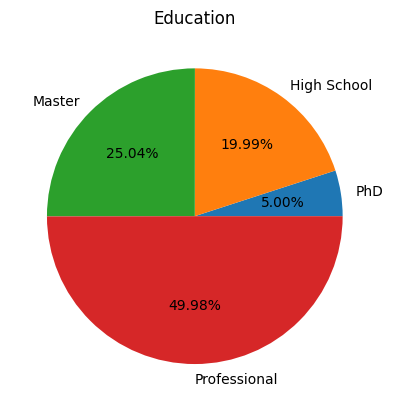

In [39]:
data = df["education"].value_counts()
data = dict(sorted(data.items(), key=lambda x : x[1]))
education = data.keys()
values = data.values()

plt.pie(values, labels=education, autopct="%.2f%%")
plt.title("Education")
plt.show()

Half of the employees in the company hold a professional degree, 20% have only a high school diploma, 25% have a master's degree, and 5% hold a PhD

# Correlation between variables

In [40]:
df.corr(numeric_only=True)

,days_service,base_salary,bonus_percentage,performance_score,vacation_days,sick_days,age
days_service,1.000000,-0.000601,-0.000051,-0.000153,-0.001122,-0.000626,0.000623
base_salary,-0.000601,1.000000,0.000292,-0.001750,0.000781,0.001251,0.000761
bonus_percentage,-0.000051,0.000292,1.000000,-0.000784,0.000488,-0.000038,0.001045
performance_score,-0.000153,-0.001750,-0.000784,1.000000,-0.000618,-0.000240,0.000270
vacation_days,-0.001122,0.000781,0.000488,-0.000618,1.000000,-0.000090,-0.000410
sick_days,-0.000626,0.001251,-0.000038,-0.000240,-0.000090,1.000000,-0.001170
age,0.000623,0.000761,0.001045,0.000270,-0.000410,-0.001170,1.000000


None of the numeric variables have a relation between them.

In [41]:
df.describe()

,hire_date,days_service,base_salary,bonus_percentage,birth_date,performance_score,last_review_date,vacation_days,sick_days,age
count,1000000,1000000.000000,1000000.000000,1000000.000000,1000000,1000000.000000,1000000,1000000.000000,1000000.000000,1000000.000000
mean,2022-10-10 03:35:22.502400768,913.850434,67003.721867,5.006408,1983-04-16 16:18:50.227199808,74.988803,2023-08-16 05:09:29.088000768,14.999514,5.002378,42.209939
min,2020-04-10 00:00:00,1.000000,30000.000000,0.000000,1959-04-12 00:00:00,26.530000,2020-04-14 00:00:00,1.000000,0.000000,18.000000
25%,2021-07-11 00:00:00,458.000000,48430.570000,3.650000,1971-04-17 00:00:00,68.260000,2022-12-25 00:00:00,12.000000,3.000000,30.000000
50%,2022-10-10 00:00:00,914.000000,62302.765000,5.000000,1983-04-22 00:00:00,75.010000,2023-10-17 00:00:00,15.000000,5.000000,42.000000
75%,2024-01-09 00:00:00,1370.000000,80337.695000,6.350000,1995-04-17 00:00:00,81.750000,2024-03-25 00:00:00,18.000000,6.000000,54.000000
max,2025-04-10 00:00:00,1827.000000,200000.000000,14.250000,2007-04-10 00:00:00,100.000000,2025-04-10 00:00:00,38.000000,19.000000,66.000000
std,NaN,527.006826,25668.545134,1.990524,NaN,9.949680,NaN,3.874181,2.234509,13.860444


# Exploratory Analysis

### Department vs Bonus Percentages

Text(0, 0.5, 'Bonus Percentage')

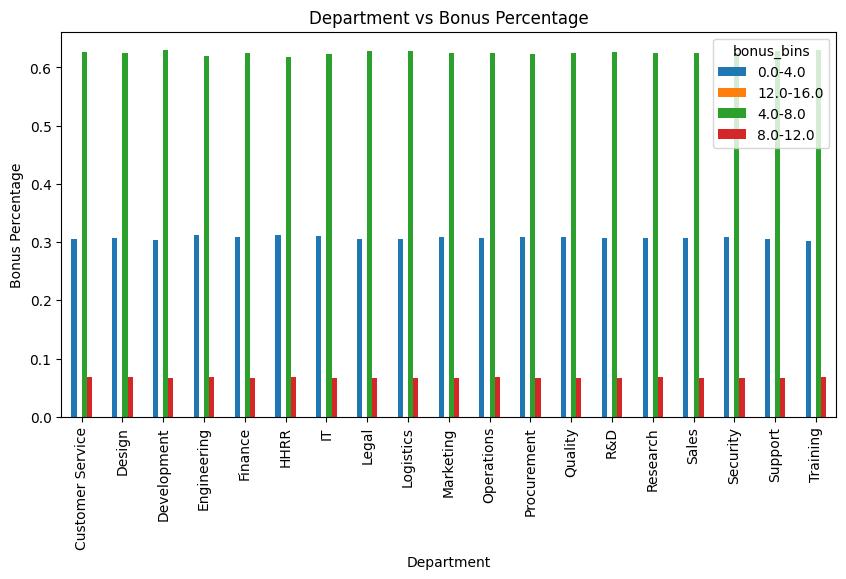

In [42]:
def bonus_bins(bonus_percentage):
    base = 4
    div = bonus_percentage / base
    return str(base * np.floor(div)) + "-" + str(base * (np.floor(div) + 1))
    
df["bonus_bins"] = df["bonus_percentage"].apply(bonus_bins)
bonus_department = pd.crosstab(df["department"], df["bonus_bins"], normalize="index")

graph = bonus_department.plot(kind="bar", title="Department vs Bonus Percentage", figsize=(10, 5))
graph.set_xlabel("Department")
graph.set_ylabel("Bonus Percentage")

The bonus percentage is distributed equally among the different deparments.  

### Education vs Gender

gender               F         M     Other
education                                 
High School   0.449046  0.450277  0.100676
Master        0.450122  0.449807  0.100071
PhD           0.451310  0.447772  0.100918
Professional  0.450037  0.449887  0.100076


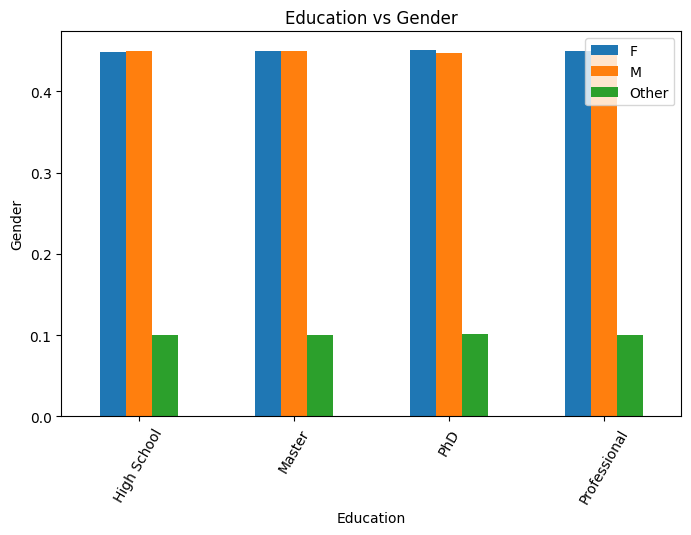

In [43]:
education_gender = pd.crosstab(df["education"], df["gender"], normalize="index")
print(education_gender)

graph = education_gender.plot(kind="bar", title="Education vs Gender", figsize=(8, 5), rot=60)
graph.set_xlabel("Education")
graph.set_ylabel("Gender")
plt.legend(loc="upper right")

The level of education among the genders is equally distributed. 

### Gender vs Base Salary

Text(0, 0.5, 'Gender')

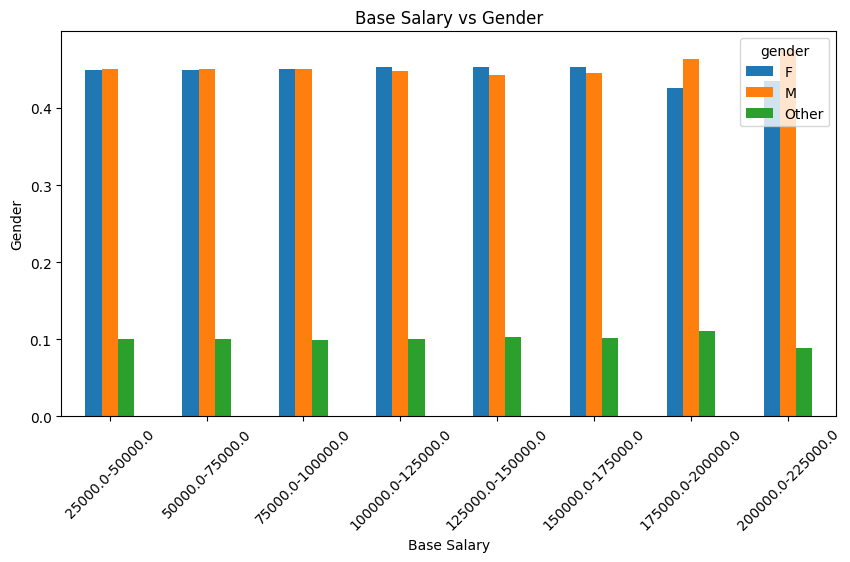

In [44]:
def salary_bins(salary):
    base = 25000
    div = salary / base
    return str(base * np.floor(div)) + "-" + str(base * (np.floor(div) + 1))

df["salary_bins"] = df["base_salary"].apply(salary_bins)
salary_gender = pd.crosstab(df["salary_bins"], df["gender"], normalize="index")
order = ["25000.0-50000.0", "50000.0-75000.0", "75000.0-100000.0", "100000.0-125000.0", "125000.0-150000.0", "150000.0-175000.0", "175000.0-200000.0", "200000.0-225000.0"]
salary_gender = salary_gender.reindex(order)

graph = salary_gender.plot(kind="bar", title="Base Salary vs Gender", figsize=(10, 5), rot=45)
graph.set_xlabel("Base Salary")
graph.set_ylabel("Gender")

The base salary among all the genders is equally distributed. 

### Department vs Base Salary

Text(0, 0.5, 'Department')

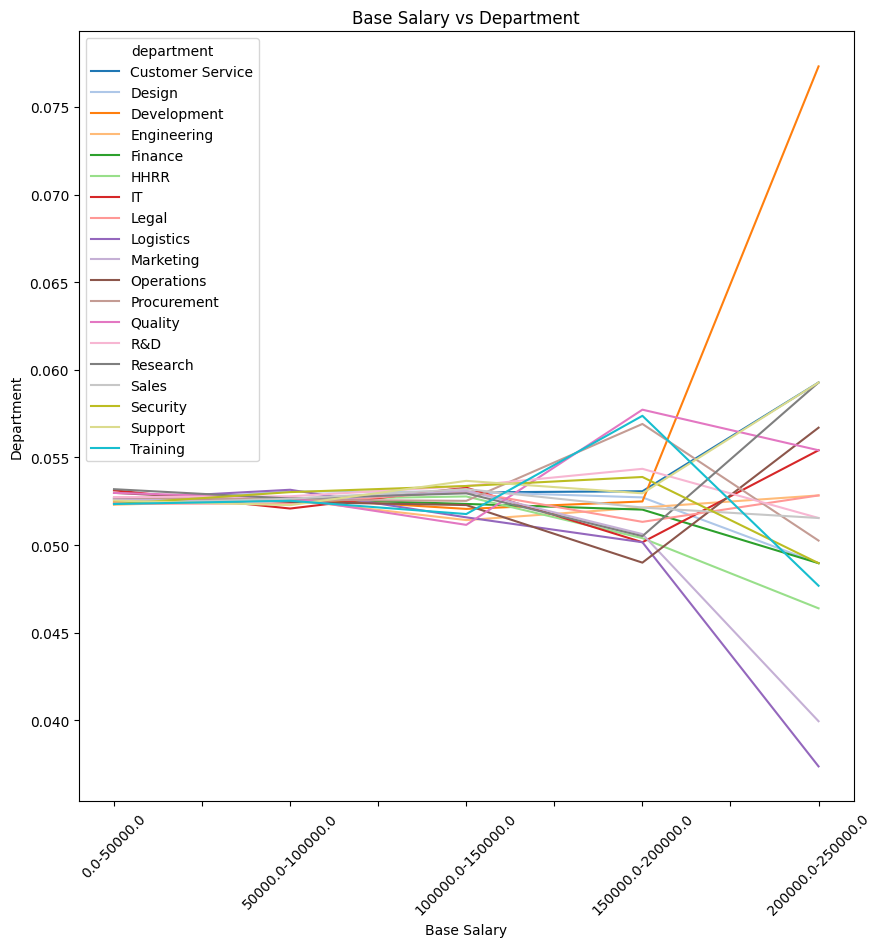

In [45]:
def salary_bins(salary):
    base = 50000
    div = salary / base
    return str(base * np.floor(div)) + "-" + str(base * (np.floor(div) + 1))

df["salary_bins"] = df["base_salary"].apply(salary_bins)
department_salary = pd.crosstab(df["salary_bins"], df["department"], normalize="index")
order = ["0.0-50000.0", "50000.0-100000.0", "100000.0-150000.0", "150000.0-200000.0", "200000.0-250000.0"]
department_salary = department_salary.reindex(order)

colors = sns.color_palette("tab20", n_colors=20)
graph = department_salary.plot(kind="line", title="Base Salary vs Department", figsize=(10, 10), rot=45, color=colors)
graph.set_xlabel("Base Salary")
graph.set_ylabel("Department")